<a href="https://colab.research.google.com/github/Juan-Ganan/Analysis-of-Optimization-Algorithms-for-the-TSP-Hill-Climbing-and-Simulated-Annealing./blob/main/Hill_Climbing_y_Simulated_Annealing_para_TSP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install tsplib95

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 23.9 MB/s eta 0:00:00
  Attempting uninstall: tabulate
    Found existing installation: tabulate 0.9.0
    Uninstalling tabulate-0.9.0:
      Successfully uninstalled tabulate-0.9.0
  Attempting uninstall: networkx
    Found existing installation: networkx 3.4.2
    Uninstalling networkx-3.4.2:
      Successfully uninstalled networkx-3.4.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torch 2.5.1+cu124 requires nvidia-cublas-cu12==12.4.5.8; platform_system == "Linux" and platform_machine == "x86_64", but you have nvidia-cublas-cu12 12.5.3.2 which is incompatible.
torch 2.5.1+cu124 requires nvidia-cuda-cupti-cu12==12.4.127; platform_system == "Linux" and platform_machine == "x86_64", but you have nvidia-cuda-cupti-cu12 12.5.82 which is incompatible.
torch 2.5.1+cu124 requires nvidia-cuda-nvrtc-cu12==12.4.1

In [23]:
import tsplib95
import networkx as nx
import matplotlib.pyplot as plt
import time

In [ ]:
tspProblem = ['att48.tsp','bier127.tsp','gr96.tsp','pr107.tsp','berlin52.tsp','d198.tsp','kroC100.tsp','rd100.tsp']

In [ ]:
def load_tsp(filename):
  '''Carga el problema TSP desde un archivo tsplib'''
  problem = tsplib95.load(filename)
  return problem

def plot_tsp(problem):
  '''Display el grafo del problema TSP con network y matplotlib'''
  G = problem.get_graph()

  if 'node_coords' in problem.as_dict():
    pos = problem.node_coords
  else:
    pos = nx.spring_layout(G)

  plt.figure(figsize=(8, 6))
  nx.draw(G, pos, with_labels=True, node_color='lightblue', edge_color='gray', node_size=30)
  plt.title('Visualización del TSP')
  plt.show()

In [24]:
import networkx as nx
import math

# Función para calcular la distancia euclidiana entre dos puntos (x1, y1) y (x2, y2)
def calcular_distancia(punto1, punto2):
    return math.sqrt((punto1[0] - punto2[0])**2 + (punto1[1] - punto2[1])**2)

# Crear un grafo vacío
problemHC = nx.Graph()

# Abrir y leer el archivo TSP
with open('att48.tsp', 'r') as file:
    lineas = file.readlines()

    # Leer las coordenadas de los nodos
    puntos = {}
    leyendo = False
    for linea in lineas:
        if linea.startswith("NODE_COORD_SECTION"):
            leyendo = True
        elif linea.startswith("EOF"):
            break
        elif leyendo:
            datos = linea.split()
            nodo = int(datos[0])
            x = float(datos[1])
            y = float(datos[2])
            puntos[nodo] = (x, y)

# Agregar los nodos y las aristas al grafo
for nodo1, coord1 in puntos.items():
    for nodo2, coord2 in puntos.items():
        if nodo1 != nodo2:  # Evitar la auto-conexión
            distancia = calcular_distancia(coord1, coord2)
            problemHC.add_edge(nodo1, nodo2, weight=distancia)

In [28]:
import random
import math
import networkx as nx


# Función para calcular la distancia total de un recorrido
def calcular_costo(recorrido, grafo):
    costo = 0
    for i in range(len(recorrido)):
        costo += grafo[recorrido[i-1]][recorrido[i]]['weight']
    return costo

# Función para generar un vecino usando 2-opt
def generar_vecino(recorrido):
    i, j = sorted(random.sample(range(len(recorrido)), 2))
    nuevo_recorrido = recorrido[:i] + recorrido[i:j+1][::-1] + recorrido[j+1:]
    return nuevo_recorrido

def hill_climbing_tsp(grafo, max_iteraciones=100000):
    nodos = list(grafo.nodes())
    recorrido_actual = random.sample(nodos, len(nodos))
    costo_actual = calcular_costo(recorrido_actual, grafo)
    history = [costo_actual]  # Inicializar el historial con el costo inicial

    for _ in range(max_iteraciones):
        vecino = generar_vecino(recorrido_actual)
        costo_vecino = calcular_costo(vecino, grafo)
        if costo_vecino < costo_actual:
            recorrido_actual = vecino
            costo_actual = costo_vecino
        history.append(costo_actual)  # Guardar el costo en cada iteración

    return recorrido_actual, costo_actual, history


In [30]:
import random
import math
import networkx as nx

# Función para calcular la distancia total de un recorrido
def calcular_costo(recorrido, grafo):
    costo = 0
    for i in range(len(recorrido)):
        costo += grafo[recorrido[i-1]][recorrido[i]]['weight']
    return costo

# Función para generar un vecino usando 2-opt
def generar_vecino(recorrido):
    i, j = sorted(random.sample(range(len(recorrido)), 2))
    nuevo_recorrido = recorrido[:i] + recorrido[i:j+1][::-1] + recorrido[j+1:]
    return nuevo_recorrido

# Algoritmo de Recocido Simulado para TSP
def simulated_annealing_tsp(grafo, temp_inicial=1000, temp_final=1, factor_enfriamiento=0.995, max_iteraciones=1000):
    nodos = list(grafo.nodes())
    recorrido_actual = random.sample(nodos, len(nodos))
    costo_actual = calcular_costo(recorrido_actual, grafo)
    history = [costo_actual]  # Inicializa el historial con el costo inicial
    temperatura = temp_inicial

    while temperatura > temp_final:
        for _ in range(max_iteraciones):
            vecino = generar_vecino(recorrido_actual)
            costo_vecino = calcular_costo(vecino, grafo)
            delta = costo_vecino - costo_actual
            if delta < 0 or random.random() < math.exp(-delta / temperatura):
                recorrido_actual = vecino
                costo_actual = costo_vecino
            history.append(costo_actual)  # Registra el costo actual en cada iteración
        temperatura *= factor_enfriamiento

    return recorrido_actual, costo_actual, history

In [ ]:
import matplotlib.pyplot as plt

def graficar_grafo(grafo, recorrido=None):
    """
    Grafica el grafo con los nodos y las aristas.
    Si se proporciona un recorrido, resalta ese recorrido en el gráfico.

    Parámetros:
        grafo (networkx.Graph): El grafo a graficar.
        recorrido (list): Una lista de nodos que representan un recorrido.
    """
    # Obtener las posiciones de los nodos
    posiciones = {nodo: (coord[0], coord[1]) for nodo, coord in puntos.items()}

    # Dibujar los nodos
    nx.draw_networkx_nodes(grafo, posiciones, node_size=50, node_color='lightblue')

    # Dibujar las aristas
    nx.draw_networkx_edges(grafo, posiciones, alpha=0.3, edge_color='gray')

    # Si se proporciona un recorrido, resaltarlo
    if recorrido:
        # Crear una lista de aristas en el recorrido
        aristas_recorrido = [(recorrido[i-1], recorrido[i]) for i in range(len(recorrido))]
        # Dibujar las aristas del recorrido
        nx.draw_networkx_edges(grafo, posiciones, edgelist=aristas_recorrido, edge_color='red', width=2)

    # Etiquetar los nodos
    nx.draw_networkx_labels(grafo, posiciones, font_size=8, font_color='black')

    # Mostrar el gráfico
    plt.title("Grafo del problema TSP")
    plt.axis('off')  # Ocultar los ejes
    plt.show()


Procesando archivo: att48.tsp
Hill Climbing - Recorrido: [17, 27, 19, 37, 6, 28, 7, 18, 44, 31, 38, 40, 9, 8, 1, 16, 22, 3, 41, 34, 48, 5, 29, 2, 26, 4, 35, 45, 10, 42, 24, 32, 39, 21, 13, 25, 14, 23, 11, 47, 20, 33, 12, 15, 46, 36, 30, 43]
Hill Climbing - Costo: 34820.264011389925
Tiempo de ejecución Hill Climbing: 2.5935 segundos


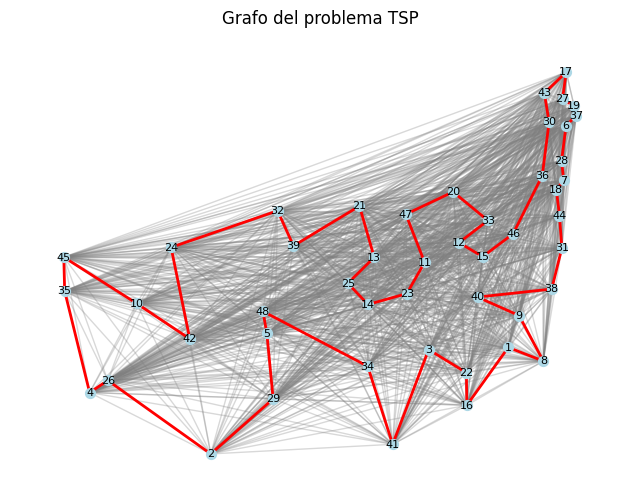

Simulated Annealing - Recorrido: [43, 30, 36, 46, 33, 15, 12, 20, 47, 11, 23, 14, 25, 13, 21, 32, 39, 48, 5, 42, 24, 10, 45, 35, 4, 26, 2, 29, 34, 41, 16, 22, 3, 40, 9, 1, 8, 38, 31, 44, 18, 7, 28, 6, 37, 19, 27, 17]
Simulated Annealing - Costo: 33588.343409211484
Tiempo de ejecución Simulated Annealing: 39.7484 segundos


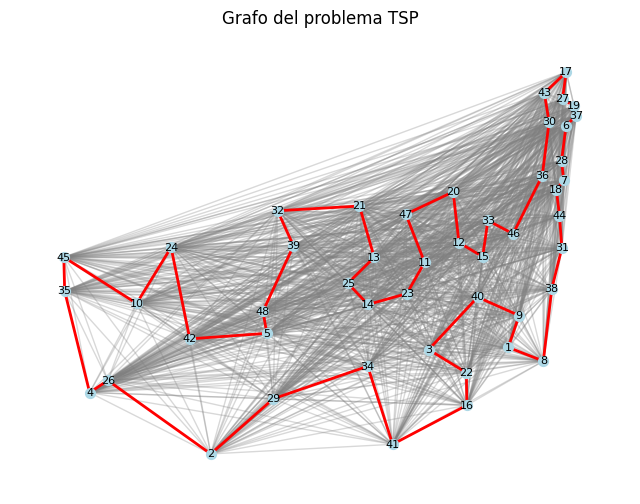


Procesando archivo: bier127.tsp
Hill Climbing - Recorrido: [50, 51, 2, 35, 37, 36, 40, 42, 38, 39, 34, 43, 41, 14, 12, 30, 31, 27, 26, 25, 33, 122, 28, 95, 123, 97, 98, 32, 29, 80, 79, 78, 117, 84, 81, 126, 82, 83, 101, 102, 63, 119, 96, 109, 69, 75, 76, 77, 18, 21, 17, 20, 22, 4, 108, 6, 106, 15, 16, 1, 7, 105, 114, 11, 9, 24, 23, 19, 72, 8, 67, 73, 74, 68, 70, 71, 59, 110, 87, 88, 86, 85, 104, 125, 89, 92, 99, 65, 66, 55, 124, 47, 49, 53, 48, 118, 46, 94, 112, 111, 107, 127, 93, 103, 45, 44, 54, 57, 121, 56, 52, 5, 115, 10, 100, 113, 64, 58, 91, 61, 62, 60, 116, 90, 3, 120, 13]
Hill Climbing - Costo: 132960.2803713803
Tiempo de ejecución Hill Climbing: 7.7906 segundos


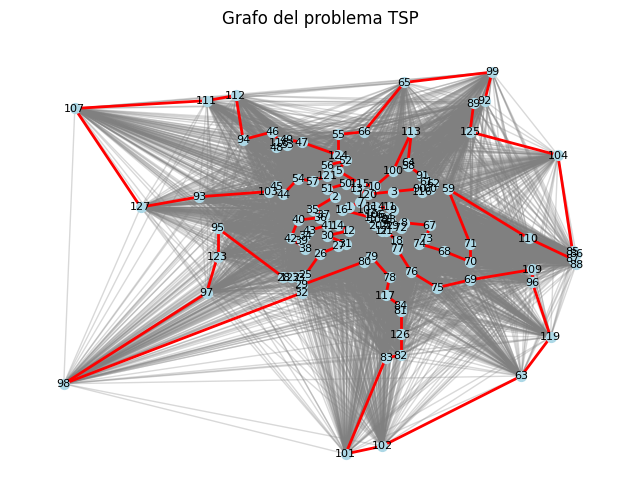

Simulated Annealing - Recorrido: [8, 67, 73, 68, 74, 18, 77, 79, 80, 78, 76, 117, 84, 81, 126, 83, 82, 75, 69, 70, 71, 110, 85, 86, 87, 88, 109, 96, 119, 63, 102, 101, 98, 97, 123, 95, 93, 127, 107, 111, 112, 94, 46, 118, 48, 53, 49, 47, 55, 66, 124, 52, 5, 56, 121, 51, 57, 54, 45, 103, 44, 40, 43, 34, 42, 39, 38, 28, 122, 32, 29, 33, 25, 26, 27, 31, 12, 14, 30, 41, 36, 35, 37, 16, 1, 2, 50, 115, 13, 7, 120, 10, 100, 58, 64, 113, 65, 99, 92, 89, 125, 104, 59, 62, 91, 61, 60, 116, 90, 3, 9, 11, 114, 105, 15, 106, 6, 108, 20, 17, 21, 22, 4, 24, 23, 19, 72]
Simulated Annealing - Costo: 121986.52701987921
Tiempo de ejecución Simulated Annealing: 101.1200 segundos


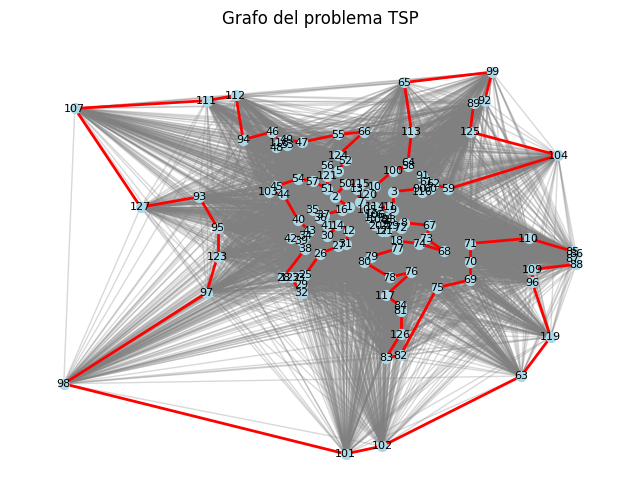


Procesando archivo: gr96.tsp
Hill Climbing - Recorrido: [49, 50, 52, 51, 55, 53, 54, 60, 61, 72, 71, 59, 58, 56, 57, 69, 70, 79, 80, 81, 82, 83, 91, 87, 90, 89, 88, 86, 84, 85, 78, 77, 74, 73, 75, 76, 92, 93, 95, 94, 96, 65, 66, 67, 68, 64, 62, 63, 27, 28, 26, 22, 19, 18, 17, 20, 21, 23, 24, 25, 48, 47, 46, 45, 44, 34, 33, 11, 16, 15, 14, 13, 12, 10, 9, 7, 8, 6, 5, 4, 3, 2, 29, 1, 30, 31, 32, 36, 37, 38, 35, 39, 40, 41, 42, 43]
Hill Climbing - Costo: 550.8371138513791
Tiempo de ejecución Hill Climbing: 4.9879 segundos


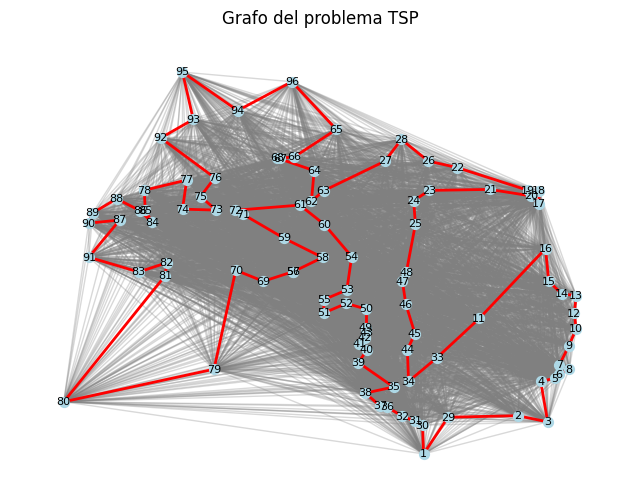

Simulated Annealing - Recorrido: [5, 8, 6, 7, 9, 10, 12, 13, 14, 15, 16, 17, 20, 18, 19, 21, 22, 23, 25, 24, 26, 28, 27, 65, 96, 95, 92, 93, 94, 68, 66, 67, 64, 63, 62, 61, 60, 59, 71, 72, 73, 74, 75, 76, 77, 78, 84, 85, 86, 87, 88, 89, 90, 91, 82, 81, 83, 80, 79, 70, 69, 57, 56, 58, 54, 53, 52, 55, 51, 50, 49, 41, 40, 39, 42, 43, 46, 47, 48, 11, 44, 45, 33, 34, 35, 38, 37, 36, 32, 31, 30, 1, 29, 2, 3, 4]
Simulated Annealing - Costo: 539.4509768587247
Tiempo de ejecución Simulated Annealing: 75.8942 segundos


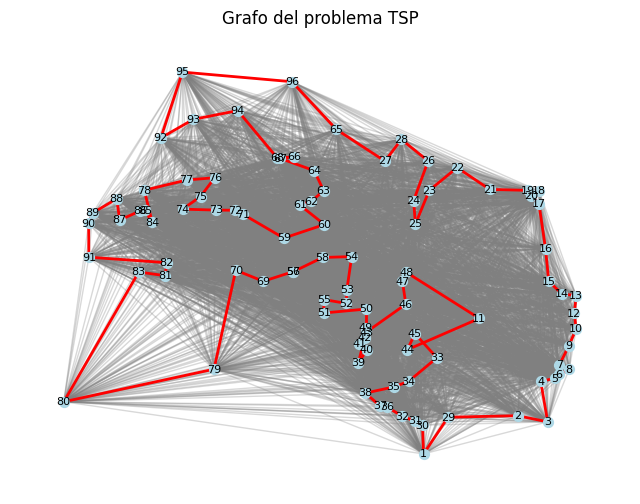


Procesando archivo: pr107.tsp
Hill Climbing - Recorrido: [7, 5, 2, 6, 1, 3, 4, 12, 13, 15, 16, 19, 21, 22, 25, 27, 28, 34, 37, 39, 40, 43, 45, 46, 49, 52, 51, 54, 53, 50, 48, 47, 44, 42, 41, 38, 55, 106, 104, 107, 105, 103, 102, 101, 56, 99, 100, 98, 97, 96, 57, 94, 95, 93, 90, 92, 91, 58, 89, 87, 88, 85, 83, 80, 77, 78, 75, 73, 71, 72, 69, 68, 65, 67, 66, 64, 63, 70, 62, 74, 76, 61, 79, 60, 81, 82, 84, 86, 59, 32, 35, 36, 33, 31, 30, 29, 26, 24, 23, 20, 18, 17, 14, 9, 10, 11, 8]
Hill Climbing - Costo: 49305.468130197616
Tiempo de ejecución Hill Climbing: 6.6851 segundos


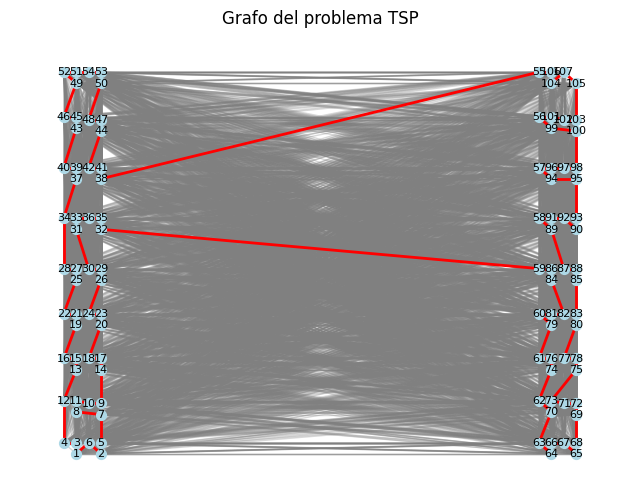

Simulated Annealing - Recorrido: [59, 89, 90, 93, 92, 91, 58, 94, 57, 96, 97, 95, 98, 100, 103, 102, 99, 56, 101, 105, 107, 106, 104, 55, 50, 53, 54, 51, 52, 49, 46, 45, 43, 48, 47, 44, 41, 38, 42, 39, 40, 37, 34, 33, 36, 35, 32, 31, 28, 27, 30, 29, 26, 25, 22, 21, 19, 24, 23, 20, 17, 14, 18, 15, 16, 13, 12, 11, 8, 10, 9, 7, 5, 6, 3, 4, 1, 2, 63, 64, 66, 67, 65, 68, 69, 72, 71, 70, 73, 62, 74, 61, 76, 77, 75, 78, 80, 83, 82, 79, 60, 81, 85, 88, 87, 86, 84]
Simulated Annealing - Costo: 44769.32967583527
Tiempo de ejecución Simulated Annealing: 84.1267 segundos


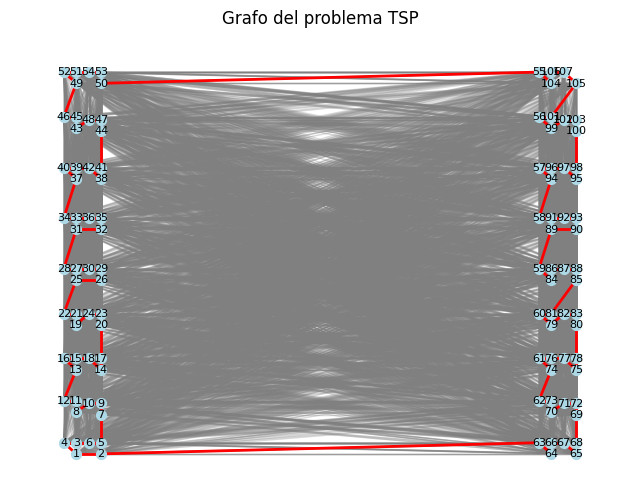


Procesando archivo: berlin52.tsp
Hill Climbing - Recorrido: [52, 11, 51, 33, 9, 10, 43, 4, 6, 15, 5, 24, 48, 38, 37, 40, 39, 36, 35, 34, 1, 22, 49, 32, 45, 19, 8, 41, 3, 18, 31, 17, 7, 2, 42, 21, 23, 20, 30, 29, 50, 16, 44, 46, 25, 12, 28, 27, 26, 47, 13, 14]
Hill Climbing - Costo: 8377.185169913751
Tiempo de ejecución Hill Climbing: 3.2478 segundos


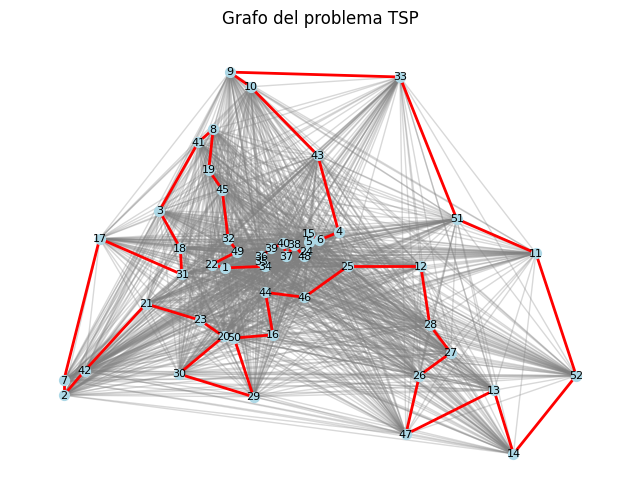

Simulated Annealing - Recorrido: [18, 3, 17, 21, 42, 7, 2, 30, 23, 20, 50, 29, 16, 46, 44, 34, 35, 36, 39, 40, 37, 38, 48, 24, 5, 15, 6, 4, 25, 12, 28, 27, 26, 47, 14, 13, 52, 11, 51, 33, 43, 10, 9, 8, 41, 19, 45, 32, 49, 1, 22, 31]
Simulated Annealing - Costo: 7544.662211251633
Tiempo de ejecución Simulated Annealing: 42.8922 segundos


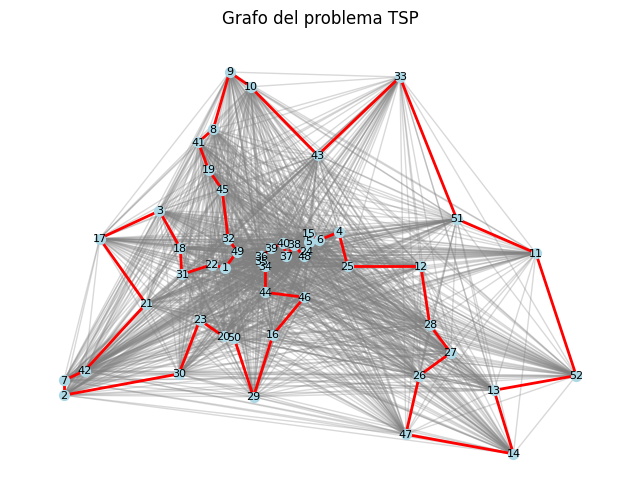


Procesando archivo: d198.tsp
Hill Climbing - Recorrido: [89, 90, 96, 81, 95, 94, 101, 102, 93, 91, 80, 79, 92, 105, 104, 103, 114, 113, 112, 111, 110, 109, 169, 125, 124, 120, 119, 118, 117, 116, 115, 122, 121, 123, 139, 154, 155, 156, 157, 158, 159, 138, 140, 142, 147, 146, 149, 148, 153, 160, 161, 162, 152, 145, 144, 143, 141, 136, 133, 135, 134, 132, 131, 126, 130, 129, 127, 170, 128, 171, 172, 137, 150, 151, 163, 164, 165, 166, 190, 191, 189, 183, 181, 177, 178, 180, 185, 184, 188, 187, 192, 193, 186, 196, 197, 198, 195, 179, 194, 174, 173, 175, 176, 182, 168, 167, 108, 107, 106, 63, 49, 48, 35, 50, 64, 78, 77, 76, 65, 62, 61, 54, 45, 38, 31, 32, 30, 33, 36, 37, 53, 46, 52, 51, 47, 39, 34, 28, 27, 26, 25, 24, 22, 21, 20, 19, 18, 23, 29, 14, 15, 17, 16, 40, 41, 5, 4, 6, 3, 1, 2, 7, 8, 9, 10, 11, 12, 13, 42, 57, 58, 69, 71, 85, 86, 100, 99, 87, 84, 72, 68, 59, 44, 43, 56, 55, 60, 67, 70, 73, 66, 74, 83, 75, 82, 88, 98, 97]
Hill Climbing - Costo: 17096.470372056236
Tiempo de ejecució

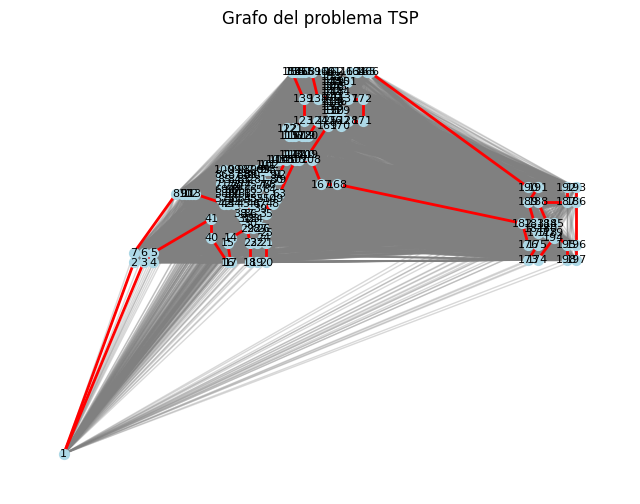

Simulated Annealing - Recorrido: [93, 101, 94, 95, 81, 96, 90, 89, 97, 98, 88, 99, 87, 84, 72, 68, 59, 56, 43, 42, 57, 58, 69, 71, 85, 100, 86, 13, 12, 11, 10, 9, 8, 5, 6, 7, 2, 1, 3, 4, 40, 41, 14, 15, 16, 17, 18, 19, 20, 21, 24, 25, 26, 27, 22, 23, 29, 30, 28, 33, 36, 37, 32, 31, 38, 44, 55, 60, 67, 73, 70, 83, 82, 74, 66, 61, 54, 45, 46, 52, 53, 62, 75, 65, 76, 77, 78, 64, 50, 51, 47, 39, 34, 35, 48, 49, 63, 79, 80, 91, 92, 105, 114, 113, 112, 106, 107, 111, 110, 109, 108, 167, 168, 182, 176, 173, 174, 175, 177, 181, 183, 178, 179, 194, 195, 198, 197, 196, 186, 193, 192, 187, 185, 180, 184, 188, 191, 190, 189, 171, 172, 166, 165, 164, 163, 151, 150, 144, 145, 146, 149, 148, 153, 152, 162, 161, 160, 159, 158, 157, 156, 155, 154, 139, 138, 140, 142, 147, 143, 141, 136, 135, 134, 132, 131, 130, 133, 129, 137, 128, 170, 127, 126, 125, 169, 124, 123, 120, 119, 118, 117, 116, 121, 122, 115, 104, 103, 102]
Simulated Annealing - Costo: 16136.795465293972
Tiempo de ejecución Simulated Anneal

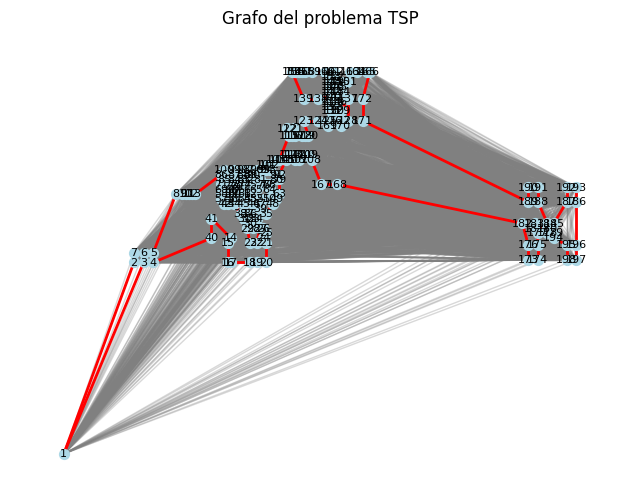


Procesando archivo: kroC100.tsp
Hill Climbing - Recorrido: [45, 81, 97, 96, 87, 52, 11, 84, 48, 66, 44, 63, 51, 16, 37, 29, 61, 9, 78, 82, 7, 26, 32, 24, 53, 1, 85, 27, 15, 13, 79, 64, 20, 42, 55, 67, 31, 47, 6, 54, 65, 80, 77, 30, 68, 2, 35, 23, 50, 62, 83, 75, 22, 8, 17, 25, 90, 34, 58, 98, 88, 28, 39, 72, 71, 38, 56, 43, 5, 86, 95, 94, 91, 76, 70, 21, 89, 41, 59, 73, 3, 69, 60, 4, 40, 12, 46, 18, 49, 93, 14, 99, 19, 92, 10, 36, 57, 74, 100, 33]
Hill Climbing - Costo: 22198.970406174325
Tiempo de ejecución Hill Climbing: 5.2208 segundos


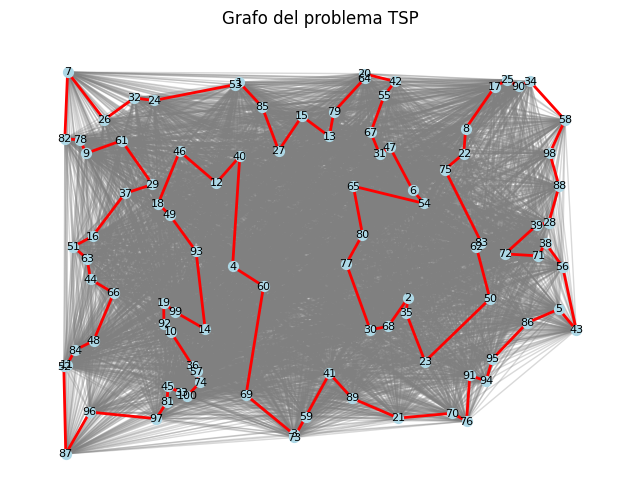

Simulated Annealing - Recorrido: [14, 69, 3, 73, 59, 41, 89, 21, 30, 68, 2, 35, 23, 70, 76, 91, 94, 95, 50, 62, 83, 72, 86, 5, 43, 56, 71, 38, 39, 28, 88, 98, 58, 34, 90, 25, 17, 8, 22, 75, 54, 6, 80, 77, 65, 31, 47, 67, 55, 42, 20, 64, 79, 13, 15, 27, 85, 1, 53, 40, 12, 46, 49, 18, 29, 37, 61, 24, 32, 26, 7, 82, 78, 9, 16, 51, 63, 44, 66, 48, 84, 11, 52, 87, 96, 97, 81, 45, 33, 100, 74, 57, 36, 10, 92, 19, 99, 93, 4, 60]
Simulated Annealing - Costo: 21126.758025298474
Tiempo de ejecución Simulated Annealing: 79.9188 segundos


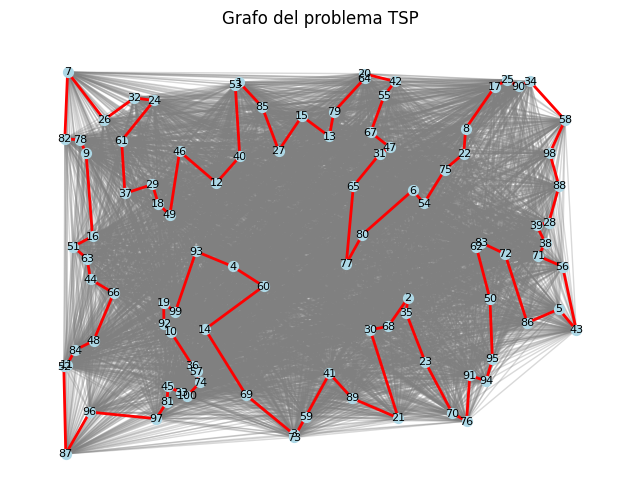


Procesando archivo: rd100.tsp
Hill Climbing - Recorrido: [17, 72, 70, 38, 54, 50, 46, 56, 19, 37, 28, 93, 77, 59, 95, 94, 98, 66, 76, 58, 89, 2, 23, 84, 88, 31, 16, 45, 52, 44, 35, 29, 100, 39, 96, 55, 40, 43, 25, 24, 42, 7, 34, 41, 22, 30, 48, 80, 81, 5, 61, 11, 91, 65, 90, 51, 83, 68, 71, 8, 69, 60, 1, 18, 62, 87, 15, 63, 86, 97, 67, 49, 13, 64, 36, 57, 47, 53, 6, 79, 99, 3, 32, 4, 75, 21, 82, 85, 14, 12, 9, 26, 74, 20, 78, 33, 10, 27, 92, 73]
Hill Climbing - Costo: 8433.831964101968
Tiempo de ejecución Hill Climbing: 5.2828 segundos


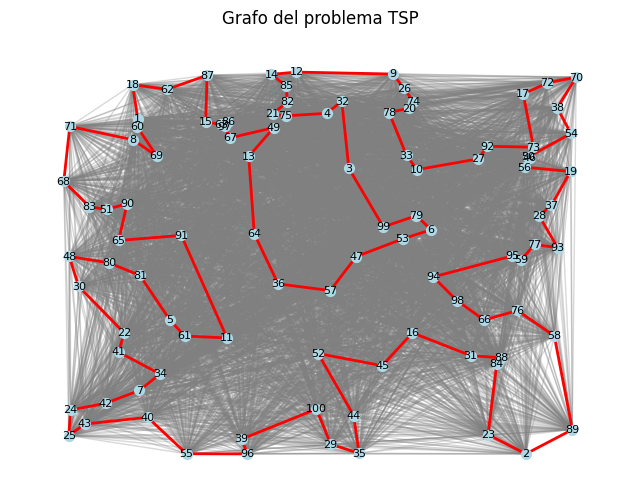

Simulated Annealing - Recorrido: [98, 94, 53, 6, 79, 99, 47, 57, 52, 100, 44, 35, 29, 96, 39, 55, 40, 43, 25, 24, 42, 7, 34, 41, 22, 5, 61, 11, 36, 64, 91, 81, 80, 30, 48, 65, 90, 51, 83, 68, 71, 8, 69, 60, 1, 18, 62, 87, 15, 63, 86, 97, 67, 13, 49, 21, 75, 82, 85, 14, 12, 4, 32, 9, 26, 74, 20, 78, 3, 33, 10, 27, 92, 17, 72, 70, 38, 54, 73, 50, 46, 56, 19, 37, 28, 93, 77, 95, 59, 76, 58, 89, 2, 23, 45, 16, 31, 84, 88, 66]
Simulated Annealing - Costo: 8013.6303483576985
Tiempo de ejecución Simulated Annealing: 78.4002 segundos


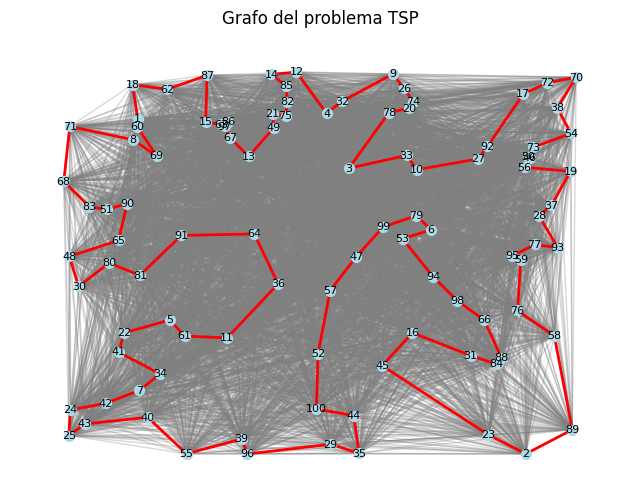

In [25]:
# --- Procesamiento de todos los archivos TSP ---
for nombre_archivo in tspProblem:
    print(f"\nProcesando archivo: {nombre_archivo}")
    grafo, puntos = load_graph(nombre_archivo)

    # Hill Climbing
    inicio_hc = time.time()
    recorrido_hc, costo_hc = hill_climbing_tsp(grafo)
    fin_hc = time.time()
    tiempo_hc = fin_hc - inicio_hc
    print("Hill Climbing - Recorrido:", recorrido_hc)
    print("Hill Climbing - Costo:", costo_hc)
    print("Tiempo de ejecución Hill Climbing: {:.4f} segundos".format(tiempo_hc))
    graficar_grafo(grafo, puntos, recorrido_hc)

    # Simulated Annealing
    inicio_sa = time.time()
    recorrido_sa, costo_sa = simulated_annealing_tsp(grafo)
    fin_sa = time.time()
    tiempo_sa = fin_sa - inicio_sa
    print("Simulated Annealing - Recorrido:", recorrido_sa)
    print("Simulated Annealing - Costo:", costo_sa)
    print("Tiempo de ejecución Simulated Annealing: {:.4f} segundos".format(tiempo_sa))
    graficar_grafo(grafo, puntos, recorrido_sa)



Procesando archivo: att48.tsp

Ejecutando Hill Climbing 10 veces...
Hill Climbing Run 1: Costo = 35044.35, Tiempo = 2.8467 s
Hill Climbing Run 2: Costo = 37273.90, Tiempo = 3.3569 s
Hill Climbing Run 3: Costo = 34239.97, Tiempo = 3.0264 s
Hill Climbing Run 4: Costo = 35264.43, Tiempo = 2.6734 s
Hill Climbing Run 5: Costo = 34388.90, Tiempo = 2.6728 s
Hill Climbing Run 6: Costo = 37065.92, Tiempo = 2.8029 s
Hill Climbing Run 7: Costo = 35379.47, Tiempo = 3.6406 s
Hill Climbing Run 8: Costo = 36177.53, Tiempo = 2.6495 s
Hill Climbing Run 9: Costo = 36039.46, Tiempo = 2.6634 s
Hill Climbing Run 10: Costo = 35796.47, Tiempo = 2.6842 s
Hill Climbing - Tiempo Promedio: 2.9017 s


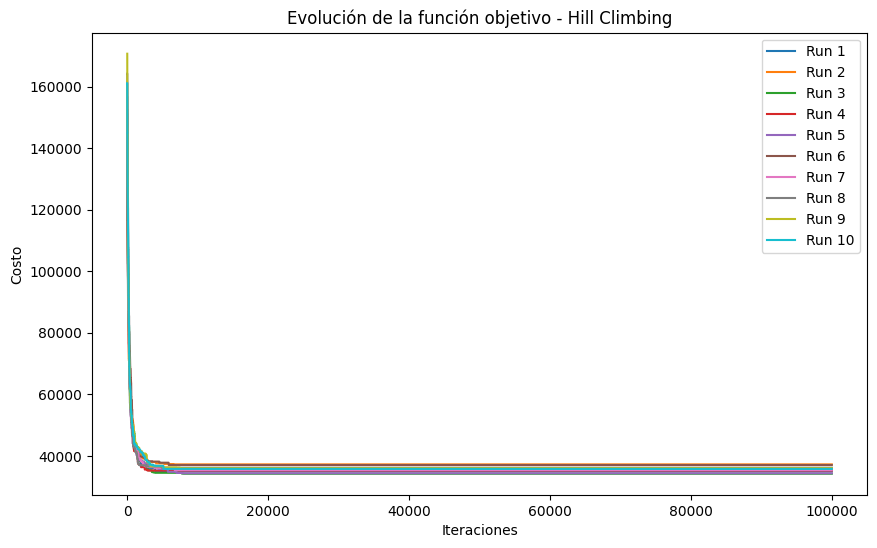

Mejor solución Hill Climbing: Costo = 34239.97083119275


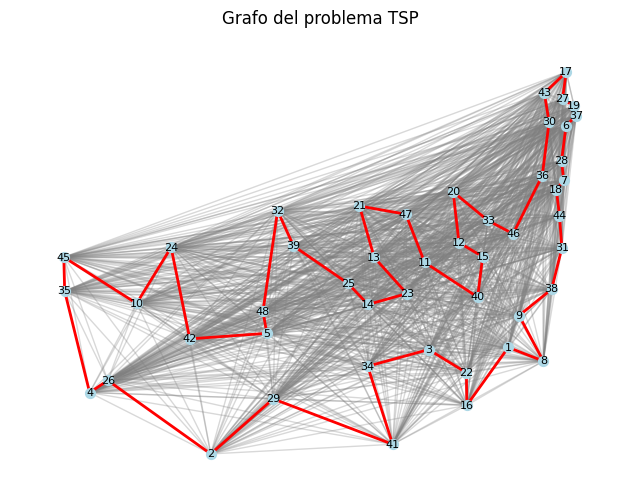


Ejecutando Simulated Annealing 10 veces...
Simulated Annealing Run 1: Costo = 33872.16, Tiempo = 41.6651 s
Simulated Annealing Run 2: Costo = 33523.71, Tiempo = 41.0023 s
Simulated Annealing Run 3: Costo = 33607.68, Tiempo = 40.5319 s
Simulated Annealing Run 4: Costo = 33755.35, Tiempo = 40.4639 s
Simulated Annealing Run 5: Costo = 33632.13, Tiempo = 41.5646 s
Simulated Annealing Run 6: Costo = 33868.73, Tiempo = 40.5507 s
Simulated Annealing Run 7: Costo = 33976.52, Tiempo = 40.9913 s
Simulated Annealing Run 8: Costo = 33588.34, Tiempo = 40.6909 s
Simulated Annealing Run 9: Costo = 33555.28, Tiempo = 41.7055 s
Simulated Annealing Run 10: Costo = 33716.60, Tiempo = 40.5440 s
Simulated Annealing - Tiempo Promedio: 40.9710 s


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


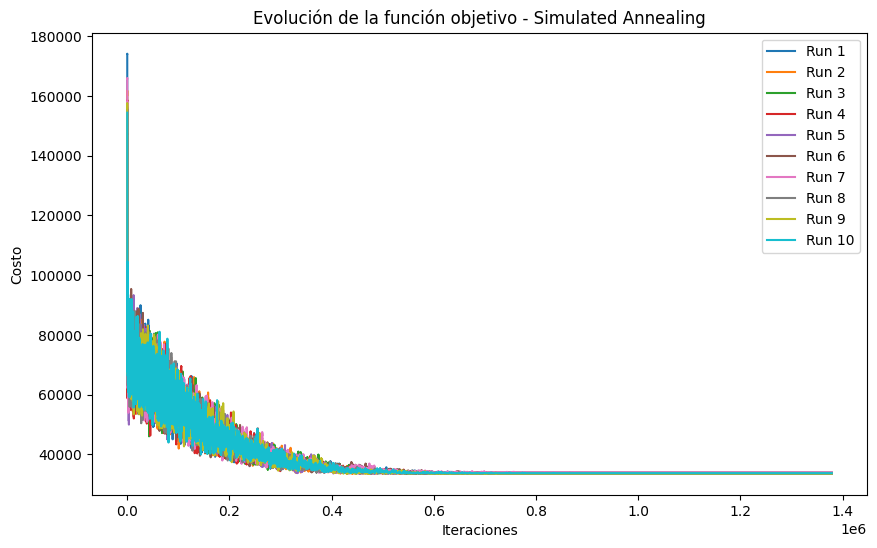

Mejor solución Simulated Annealing: Costo = 33523.70850743559


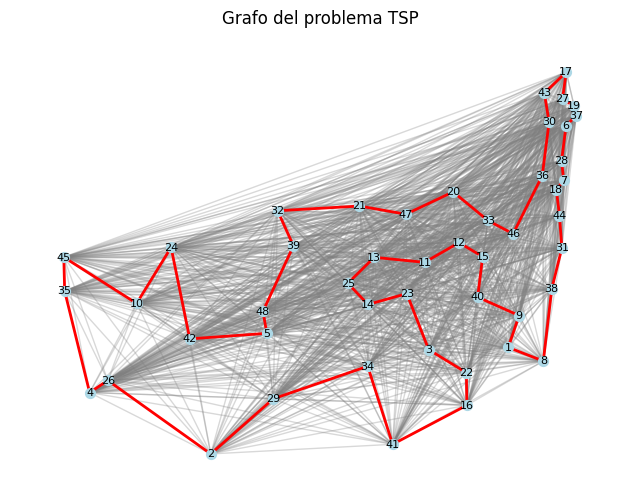


Procesando archivo: bier127.tsp

Ejecutando Hill Climbing 10 veces...
Hill Climbing Run 1: Costo = 128847.57, Tiempo = 6.4665 s
Hill Climbing Run 2: Costo = 132501.25, Tiempo = 7.5847 s
Hill Climbing Run 3: Costo = 126507.27, Tiempo = 6.4255 s
Hill Climbing Run 4: Costo = 131938.34, Tiempo = 7.5208 s
Hill Climbing Run 5: Costo = 132226.94, Tiempo = 6.4403 s
Hill Climbing Run 6: Costo = 132022.49, Tiempo = 7.5167 s
Hill Climbing Run 7: Costo = 133300.36, Tiempo = 6.9894 s
Hill Climbing Run 8: Costo = 131722.60, Tiempo = 6.9545 s
Hill Climbing Run 9: Costo = 128425.41, Tiempo = 7.5620 s
Hill Climbing Run 10: Costo = 131378.34, Tiempo = 6.3976 s
Hill Climbing - Tiempo Promedio: 6.9858 s


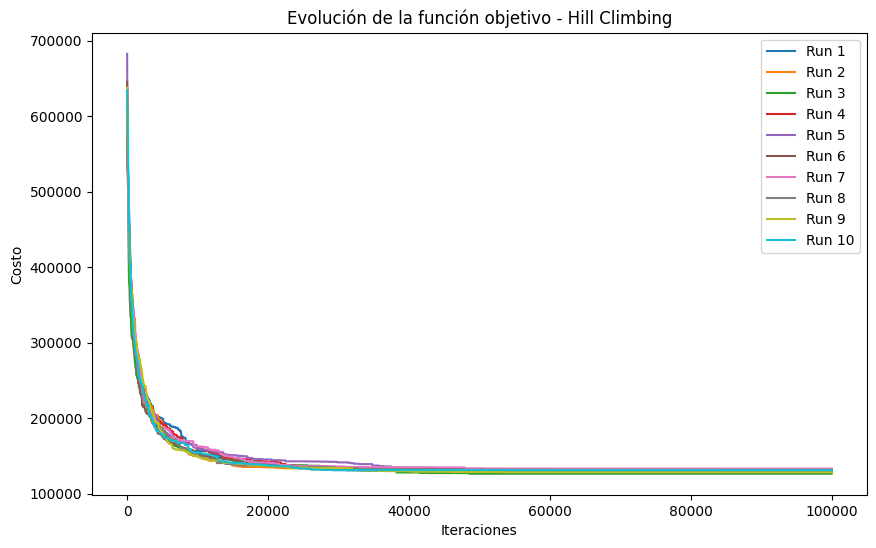

Mejor solución Hill Climbing: Costo = 126507.26562491346


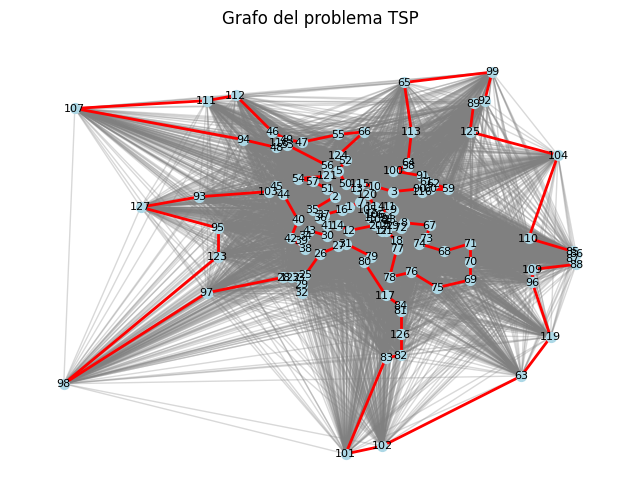


Ejecutando Simulated Annealing 10 veces...
Simulated Annealing Run 1: Costo = 120909.91, Tiempo = 98.6260 s
Simulated Annealing Run 2: Costo = 121342.16, Tiempo = 98.5295 s
Simulated Annealing Run 3: Costo = 119188.16, Tiempo = 99.0041 s
Simulated Annealing Run 4: Costo = 119941.68, Tiempo = 98.6080 s
Simulated Annealing Run 5: Costo = 120791.53, Tiempo = 98.3645 s
Simulated Annealing Run 6: Costo = 121581.27, Tiempo = 98.9215 s
Simulated Annealing Run 7: Costo = 118701.43, Tiempo = 102.8943 s
Simulated Annealing Run 8: Costo = 120416.41, Tiempo = 98.7673 s
Simulated Annealing Run 9: Costo = 119042.87, Tiempo = 99.9961 s
Simulated Annealing Run 10: Costo = 120289.83, Tiempo = 99.4385 s
Simulated Annealing - Tiempo Promedio: 99.3150 s


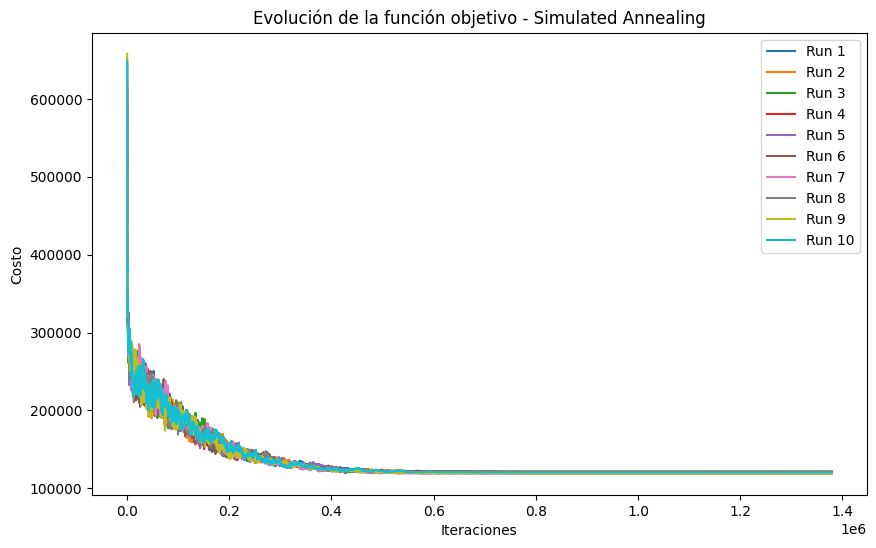

Mejor solución Simulated Annealing: Costo = 118701.4280071602


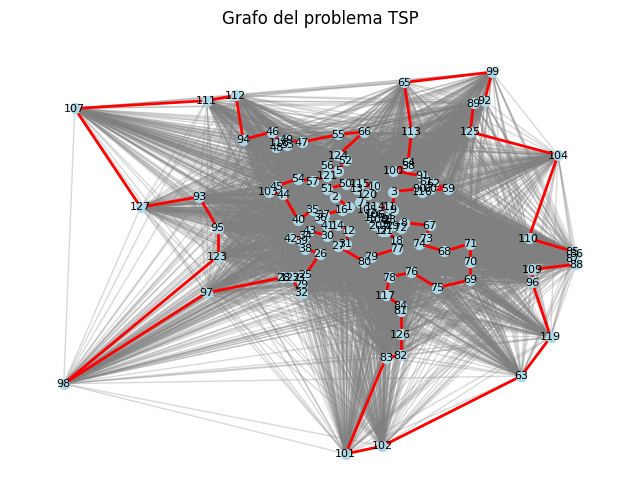


Procesando archivo: gr96.tsp

Ejecutando Hill Climbing 10 veces...
Hill Climbing Run 1: Costo = 531.57, Tiempo = 6.1728 s
Hill Climbing Run 2: Costo = 548.99, Tiempo = 4.9862 s
Hill Climbing Run 3: Costo = 530.92, Tiempo = 6.0738 s
Hill Climbing Run 4: Costo = 565.71, Tiempo = 4.9943 s
Hill Climbing Run 5: Costo = 602.27, Tiempo = 6.0614 s
Hill Climbing Run 6: Costo = 564.70, Tiempo = 5.0394 s
Hill Climbing Run 7: Costo = 558.06, Tiempo = 5.2519 s
Hill Climbing Run 8: Costo = 528.07, Tiempo = 5.8180 s
Hill Climbing Run 9: Costo = 556.35, Tiempo = 5.0007 s
Hill Climbing Run 10: Costo = 543.40, Tiempo = 6.1039 s
Hill Climbing - Tiempo Promedio: 5.5502 s


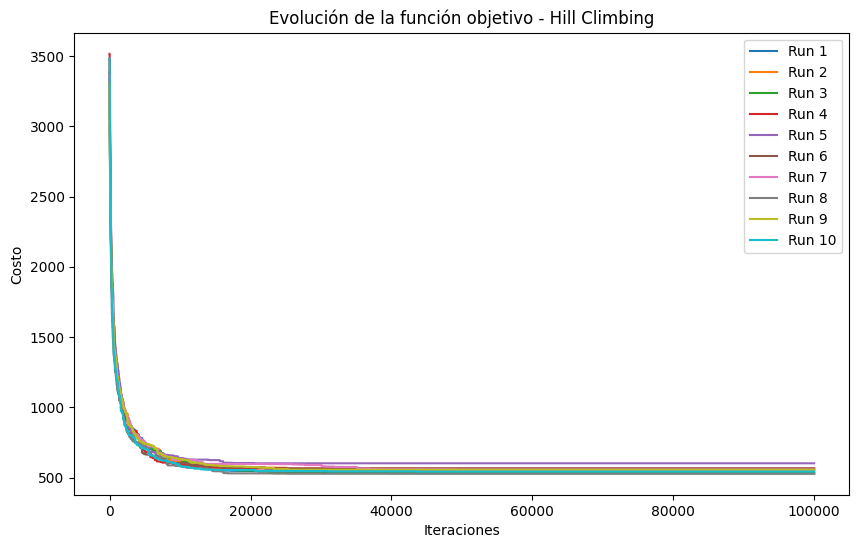

Mejor solución Hill Climbing: Costo = 528.0693300333501


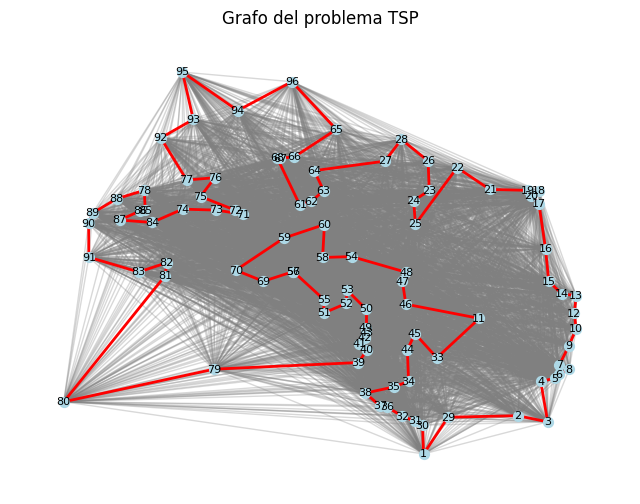


Ejecutando Simulated Annealing 10 veces...
Simulated Annealing Run 1: Costo = 540.97, Tiempo = 76.4793 s
Simulated Annealing Run 2: Costo = 529.42, Tiempo = 76.6680 s
Simulated Annealing Run 3: Costo = 521.94, Tiempo = 76.5869 s
Simulated Annealing Run 4: Costo = 554.24, Tiempo = 76.6959 s
Simulated Annealing Run 5: Costo = 540.62, Tiempo = 76.2707 s
Simulated Annealing Run 6: Costo = 532.12, Tiempo = 76.5380 s
Simulated Annealing Run 7: Costo = 537.25, Tiempo = 76.2089 s
Simulated Annealing Run 8: Costo = 533.30, Tiempo = 76.3015 s
Simulated Annealing Run 9: Costo = 535.16, Tiempo = 76.5692 s
Simulated Annealing Run 10: Costo = 531.76, Tiempo = 76.5301 s
Simulated Annealing - Tiempo Promedio: 76.4849 s


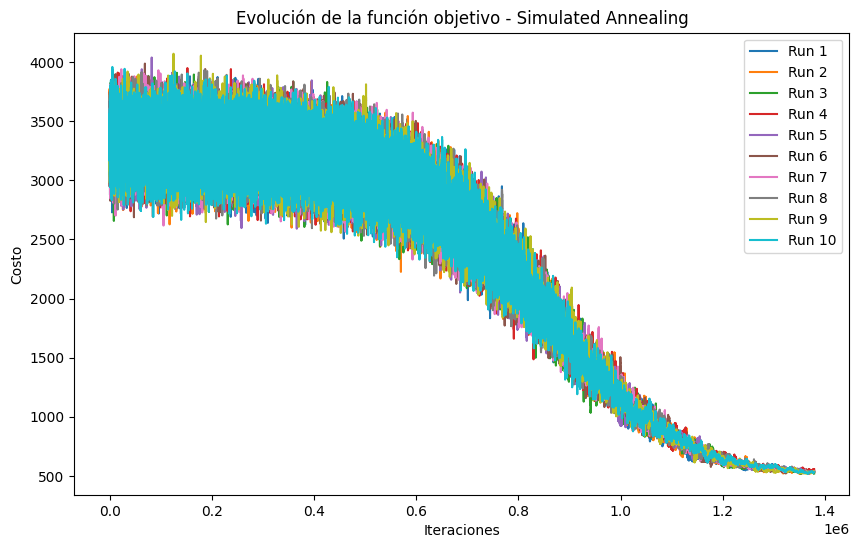

Mejor solución Simulated Annealing: Costo = 521.9444133076591


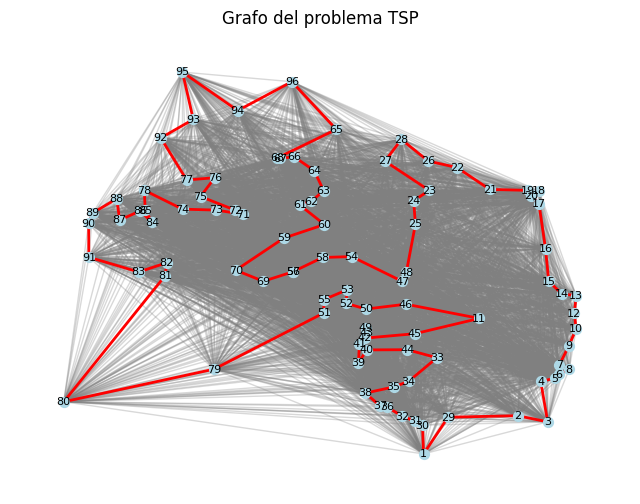


Procesando archivo: pr107.tsp

Ejecutando Hill Climbing 10 veces...
Hill Climbing Run 1: Costo = 48503.64, Tiempo = 6.5703 s
Hill Climbing Run 2: Costo = 49073.13, Tiempo = 5.4636 s
Hill Climbing Run 3: Costo = 47326.26, Tiempo = 6.6035 s
Hill Climbing Run 4: Costo = 47000.33, Tiempo = 5.4445 s
Hill Climbing Run 5: Costo = 48283.02, Tiempo = 6.1310 s
Hill Climbing Run 6: Costo = 47644.13, Tiempo = 5.8904 s
Hill Climbing Run 7: Costo = 47170.35, Tiempo = 5.6224 s
Hill Climbing Run 8: Costo = 47353.20, Tiempo = 6.3772 s
Hill Climbing Run 9: Costo = 46018.62, Tiempo = 5.4854 s
Hill Climbing Run 10: Costo = 50796.55, Tiempo = 6.6108 s
Hill Climbing - Tiempo Promedio: 6.0199 s


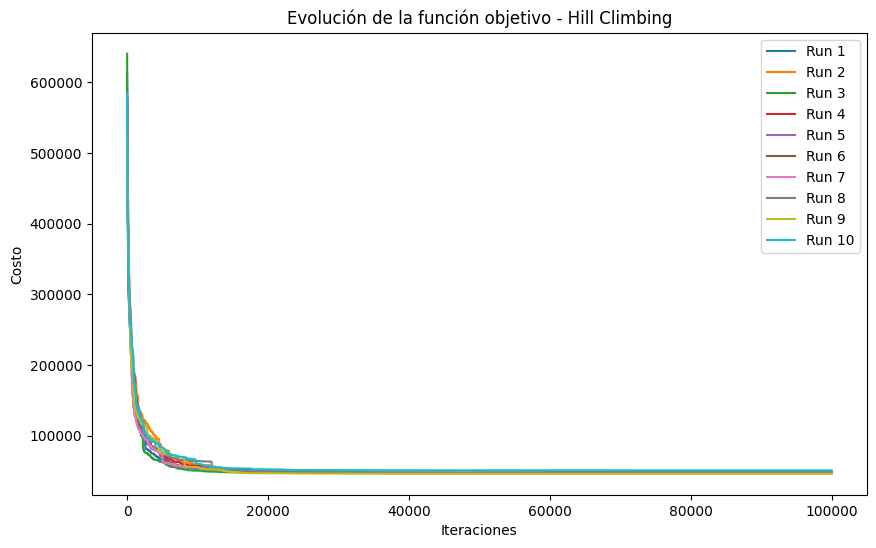

Mejor solución Hill Climbing: Costo = 46018.62276066685


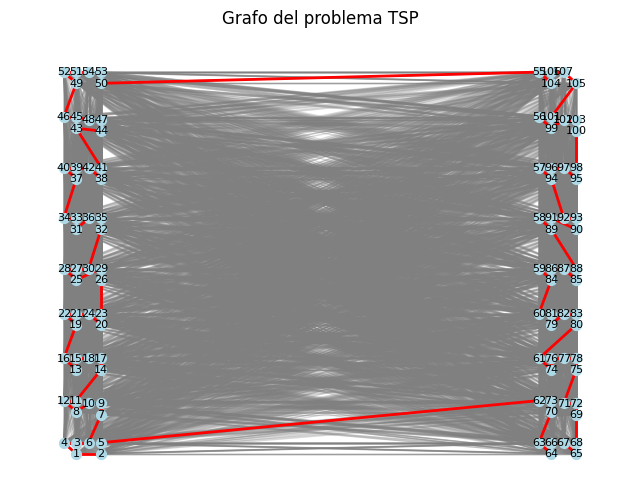


Ejecutando Simulated Annealing 10 veces...
Simulated Annealing Run 1: Costo = 44689.26, Tiempo = 84.8552 s
Simulated Annealing Run 2: Costo = 44614.69, Tiempo = 83.2524 s
Simulated Annealing Run 3: Costo = 44579.41, Tiempo = 84.1563 s
Simulated Annealing Run 4: Costo = 44541.26, Tiempo = 84.6349 s
Simulated Annealing Run 5: Costo = 44609.54, Tiempo = 83.5381 s
Simulated Annealing Run 6: Costo = 44471.92, Tiempo = 84.7377 s
Simulated Annealing Run 7: Costo = 44744.11, Tiempo = 84.4213 s
Simulated Annealing Run 8: Costo = 44624.61, Tiempo = 82.9597 s
Simulated Annealing Run 9: Costo = 44436.24, Tiempo = 84.5234 s
Simulated Annealing Run 10: Costo = 44725.40, Tiempo = 84.6185 s
Simulated Annealing - Tiempo Promedio: 84.1697 s


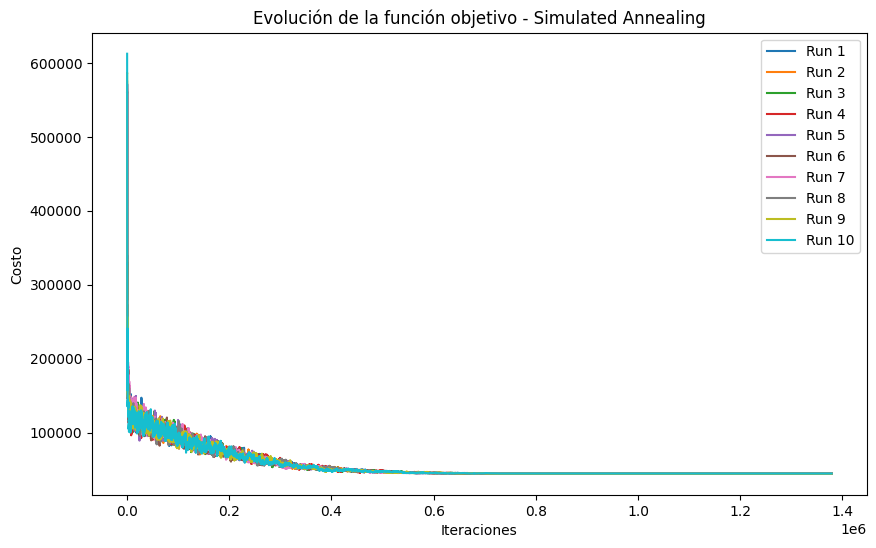

Mejor solución Simulated Annealing: Costo = 44436.23712746006


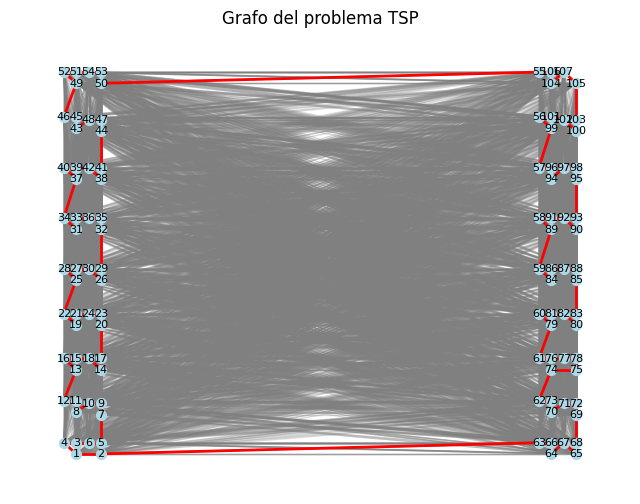


Procesando archivo: berlin52.tsp

Ejecutando Hill Climbing 10 veces...
Hill Climbing Run 1: Costo = 7835.65, Tiempo = 4.0459 s
Hill Climbing Run 2: Costo = 8064.51, Tiempo = 2.9007 s
Hill Climbing Run 3: Costo = 7619.15, Tiempo = 2.9289 s
Hill Climbing Run 4: Costo = 8153.55, Tiempo = 2.8898 s
Hill Climbing Run 5: Costo = 7892.22, Tiempo = 4.0027 s
Hill Climbing Run 6: Costo = 8366.97, Tiempo = 2.9326 s
Hill Climbing Run 7: Costo = 8262.65, Tiempo = 2.9049 s
Hill Climbing Run 8: Costo = 8193.66, Tiempo = 2.8995 s
Hill Climbing Run 9: Costo = 8169.96, Tiempo = 3.9651 s
Hill Climbing Run 10: Costo = 8009.68, Tiempo = 2.9252 s
Hill Climbing - Tiempo Promedio: 3.2395 s


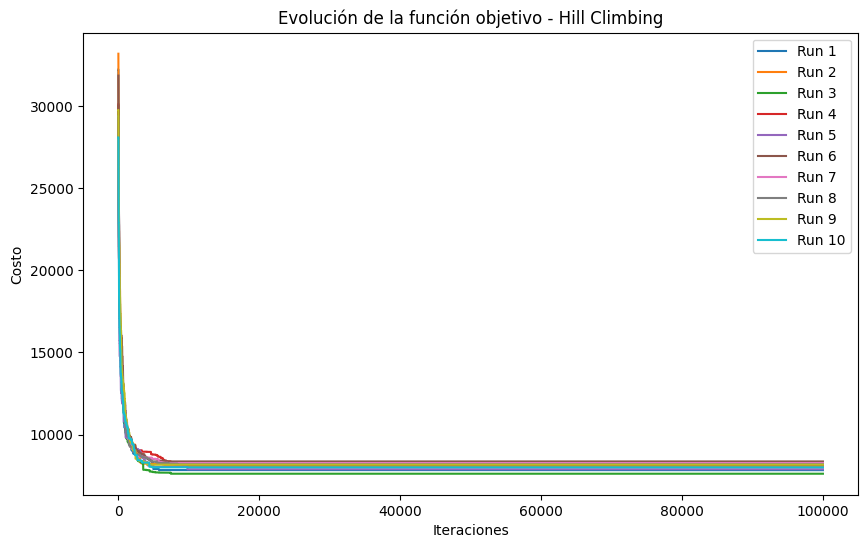

Mejor solución Hill Climbing: Costo = 7619.1531013811455


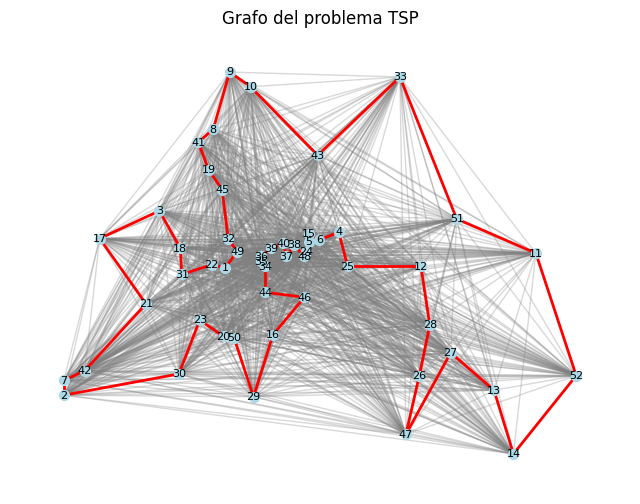


Ejecutando Simulated Annealing 10 veces...
Simulated Annealing Run 1: Costo = 7544.66, Tiempo = 42.5576 s
Simulated Annealing Run 2: Costo = 7544.37, Tiempo = 43.7103 s
Simulated Annealing Run 3: Costo = 7544.37, Tiempo = 42.4947 s
Simulated Annealing Run 4: Costo = 7544.66, Tiempo = 44.1642 s
Simulated Annealing Run 5: Costo = 7544.66, Tiempo = 42.4921 s
Simulated Annealing Run 6: Costo = 7544.66, Tiempo = 42.6559 s
Simulated Annealing Run 7: Costo = 7544.66, Tiempo = 43.5800 s
Simulated Annealing Run 8: Costo = 7544.37, Tiempo = 42.5586 s
Simulated Annealing Run 9: Costo = 7544.37, Tiempo = 44.0211 s
Simulated Annealing Run 10: Costo = 7544.66, Tiempo = 42.6177 s
Simulated Annealing - Tiempo Promedio: 43.0852 s


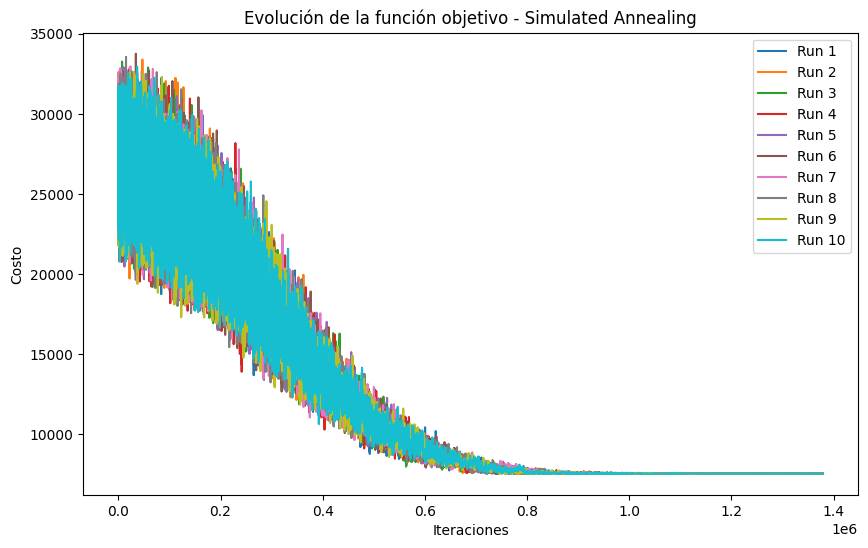

Mejor solución Simulated Annealing: Costo = 7544.365901904087


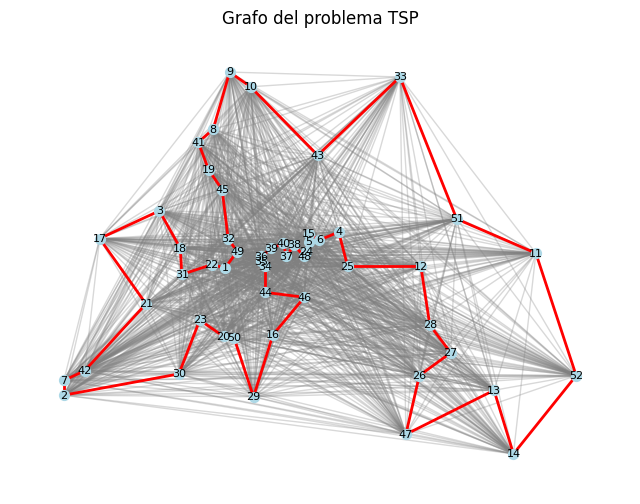


Procesando archivo: d198.tsp

Ejecutando Hill Climbing 10 veces...
Hill Climbing Run 1: Costo = 16971.01, Tiempo = 11.3425 s
Hill Climbing Run 2: Costo = 16710.32, Tiempo = 11.4000 s
Hill Climbing Run 3: Costo = 16582.70, Tiempo = 11.0875 s
Hill Climbing Run 4: Costo = 17134.08, Tiempo = 10.6820 s
Hill Climbing Run 5: Costo = 16789.42, Tiempo = 11.3698 s
Hill Climbing Run 6: Costo = 17191.91, Tiempo = 11.3478 s
Hill Climbing Run 7: Costo = 16751.81, Tiempo = 11.2643 s
Hill Climbing Run 8: Costo = 16733.30, Tiempo = 11.3371 s
Hill Climbing Run 9: Costo = 16570.68, Tiempo = 11.2485 s
Hill Climbing Run 10: Costo = 17049.28, Tiempo = 11.2637 s
Hill Climbing - Tiempo Promedio: 11.2343 s


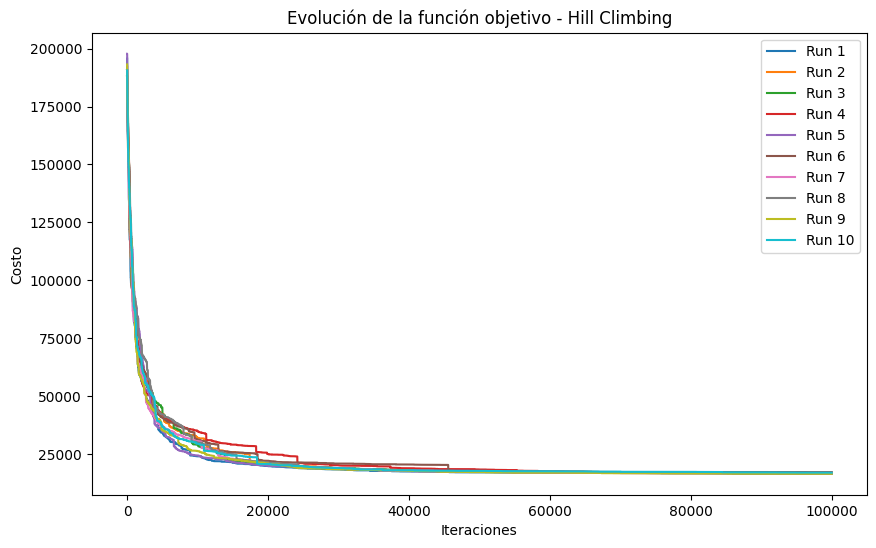

Mejor solución Hill Climbing: Costo = 16570.68160406872


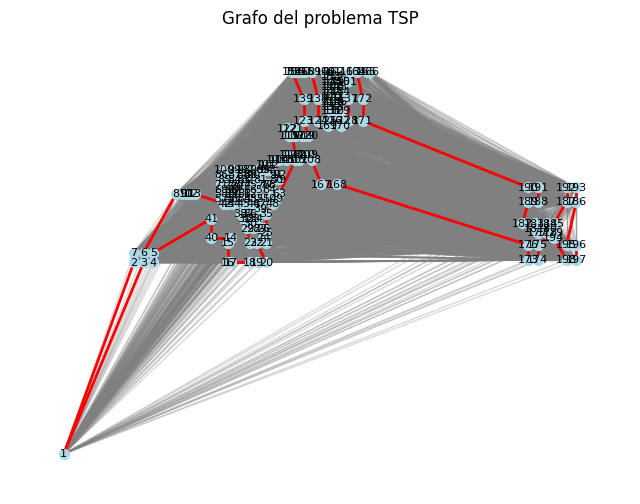


Ejecutando Simulated Annealing 10 veces...
Simulated Annealing Run 1: Costo = 15993.27, Tiempo = 153.1742 s
Simulated Annealing Run 2: Costo = 15919.51, Tiempo = 156.2394 s
Simulated Annealing Run 3: Costo = 16113.38, Tiempo = 155.9034 s
Simulated Annealing Run 4: Costo = 16092.62, Tiempo = 155.1750 s
Simulated Annealing Run 5: Costo = 15970.26, Tiempo = 154.7142 s
Simulated Annealing Run 6: Costo = 16012.71, Tiempo = 155.6075 s
Simulated Annealing Run 7: Costo = 16057.58, Tiempo = 154.8088 s
Simulated Annealing Run 8: Costo = 15941.29, Tiempo = 154.9368 s
Simulated Annealing Run 9: Costo = 15992.96, Tiempo = 157.7876 s
Simulated Annealing Run 10: Costo = 16159.06, Tiempo = 155.6899 s
Simulated Annealing - Tiempo Promedio: 155.4037 s


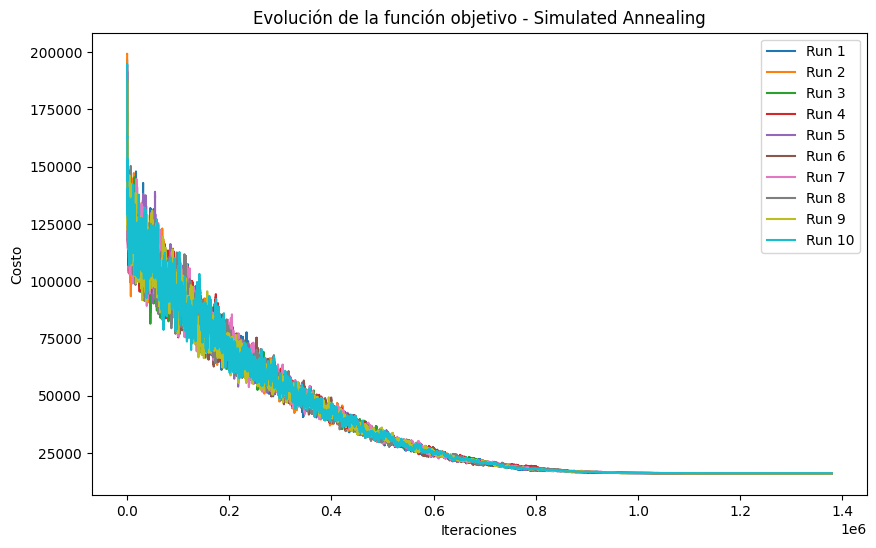

Mejor solución Simulated Annealing: Costo = 15919.512287989788


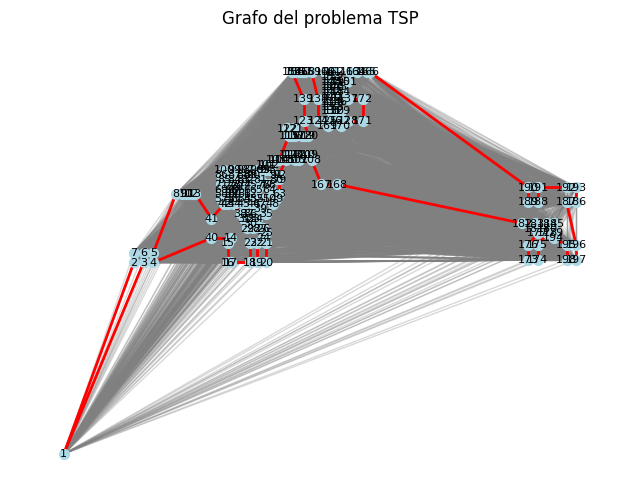


Procesando archivo: kroC100.tsp

Ejecutando Hill Climbing 10 veces...
Hill Climbing Run 1: Costo = 22176.41, Tiempo = 5.2787 s
Hill Climbing Run 2: Costo = 22346.14, Tiempo = 6.3624 s
Hill Climbing Run 3: Costo = 23626.03, Tiempo = 5.2419 s
Hill Climbing Run 4: Costo = 22551.54, Tiempo = 6.2257 s
Hill Climbing Run 5: Costo = 24221.88, Tiempo = 5.3431 s
Hill Climbing Run 6: Costo = 21668.92, Tiempo = 5.4985 s
Hill Climbing Run 7: Costo = 23467.91, Tiempo = 6.0921 s
Hill Climbing Run 8: Costo = 23319.79, Tiempo = 5.2574 s
Hill Climbing Run 9: Costo = 22353.28, Tiempo = 6.3325 s
Hill Climbing Run 10: Costo = 24303.88, Tiempo = 5.2202 s
Hill Climbing - Tiempo Promedio: 5.6852 s


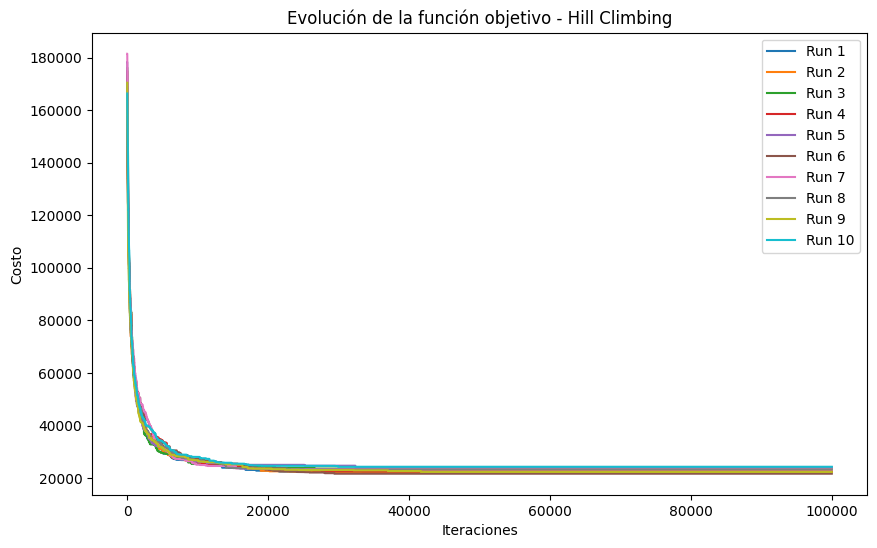

Mejor solución Hill Climbing: Costo = 21668.918367922073


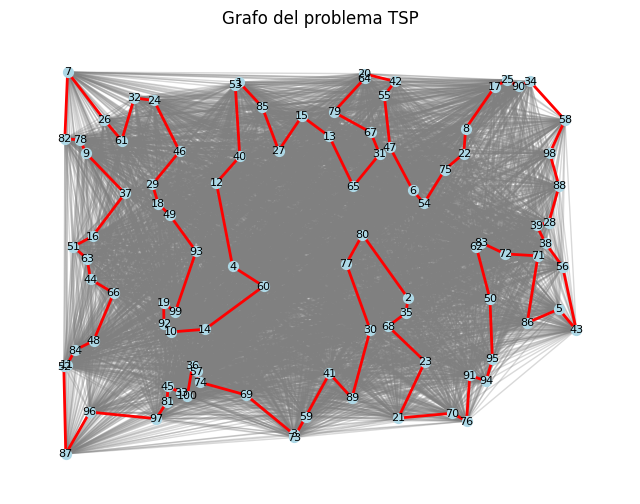


Ejecutando Simulated Annealing 10 veces...
Simulated Annealing Run 1: Costo = 20962.09, Tiempo = 81.2856 s
Simulated Annealing Run 2: Costo = 21062.37, Tiempo = 79.4700 s
Simulated Annealing Run 3: Costo = 20966.05, Tiempo = 79.0130 s
Simulated Annealing Run 4: Costo = 21176.27, Tiempo = 80.4141 s
Simulated Annealing Run 5: Costo = 20908.91, Tiempo = 79.8633 s
Simulated Annealing Run 6: Costo = 21010.05, Tiempo = 80.2598 s
Simulated Annealing Run 7: Costo = 20753.87, Tiempo = 80.7842 s
Simulated Annealing Run 8: Costo = 20755.26, Tiempo = 79.9742 s
Simulated Annealing Run 9: Costo = 20872.77, Tiempo = 79.3286 s
Simulated Annealing Run 10: Costo = 21025.75, Tiempo = 81.0248 s
Simulated Annealing - Tiempo Promedio: 80.1418 s


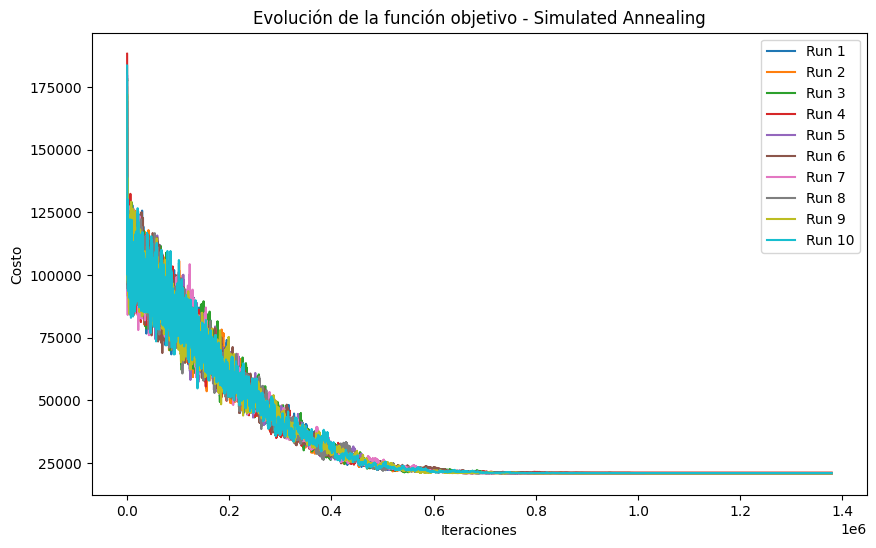

Mejor solución Simulated Annealing: Costo = 20753.866712609168


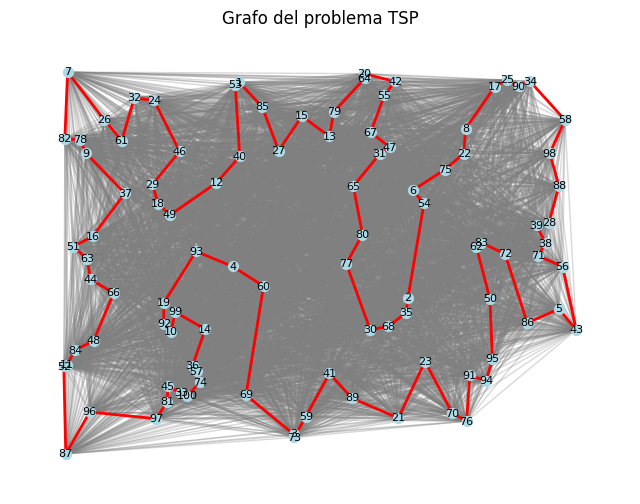


Procesando archivo: rd100.tsp

Ejecutando Hill Climbing 10 veces...
Hill Climbing Run 1: Costo = 8512.62, Tiempo = 6.4227 s
Hill Climbing Run 2: Costo = 9321.68, Tiempo = 5.2419 s
Hill Climbing Run 3: Costo = 8987.47, Tiempo = 6.3674 s
Hill Climbing Run 4: Costo = 8707.78, Tiempo = 5.2692 s
Hill Climbing Run 5: Costo = 8728.36, Tiempo = 6.3439 s
Hill Climbing Run 6: Costo = 9155.70, Tiempo = 5.2188 s
Hill Climbing Run 7: Costo = 8837.31, Tiempo = 6.4059 s
Hill Climbing Run 8: Costo = 9021.44, Tiempo = 5.2228 s
Hill Climbing Run 9: Costo = 9100.04, Tiempo = 5.7178 s
Hill Climbing Run 10: Costo = 8693.29, Tiempo = 5.9959 s
Hill Climbing - Tiempo Promedio: 5.8206 s


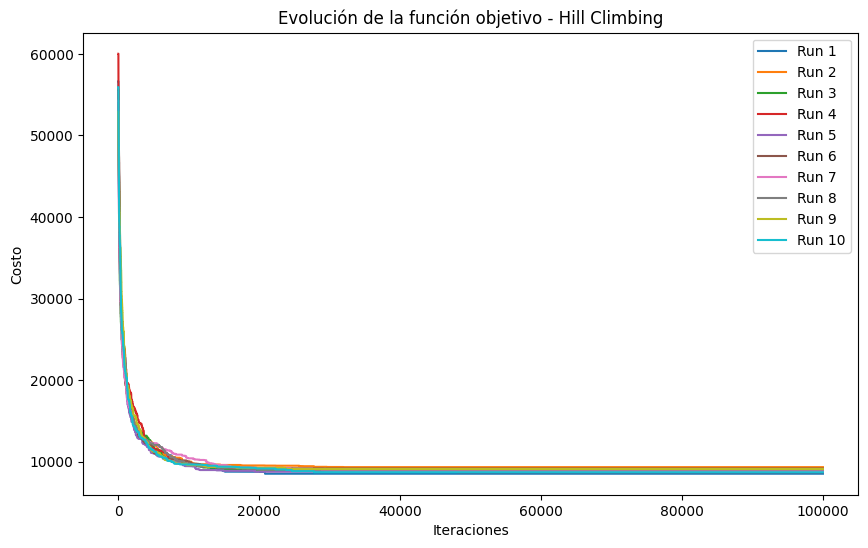

Mejor solución Hill Climbing: Costo = 8512.622305221561


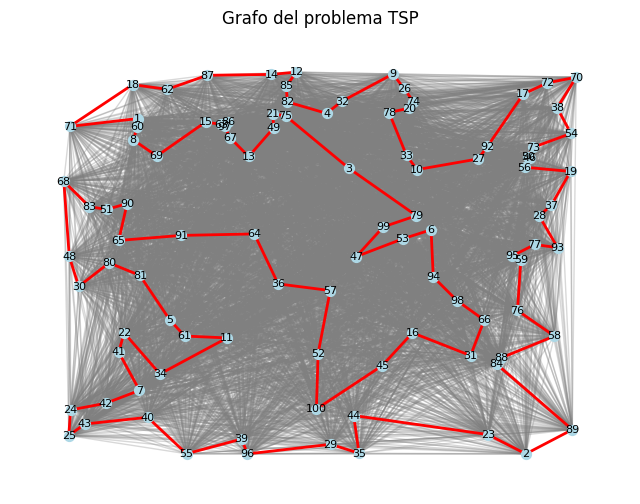


Ejecutando Simulated Annealing 10 veces...
Simulated Annealing Run 1: Costo = 7963.51, Tiempo = 79.2943 s
Simulated Annealing Run 2: Costo = 8070.56, Tiempo = 80.0779 s
Simulated Annealing Run 3: Costo = 8234.05, Tiempo = 78.8801 s
Simulated Annealing Run 4: Costo = 8056.48, Tiempo = 79.0963 s
Simulated Annealing Run 5: Costo = 8007.21, Tiempo = 78.8127 s
Simulated Annealing Run 6: Costo = 8072.91, Tiempo = 80.0012 s
Simulated Annealing Run 7: Costo = 8063.46, Tiempo = 79.0280 s
Simulated Annealing Run 8: Costo = 8059.44, Tiempo = 79.0399 s
Simulated Annealing Run 9: Costo = 8101.25, Tiempo = 79.7831 s
Simulated Annealing Run 10: Costo = 8370.98, Tiempo = 79.7091 s
Simulated Annealing - Tiempo Promedio: 79.3723 s


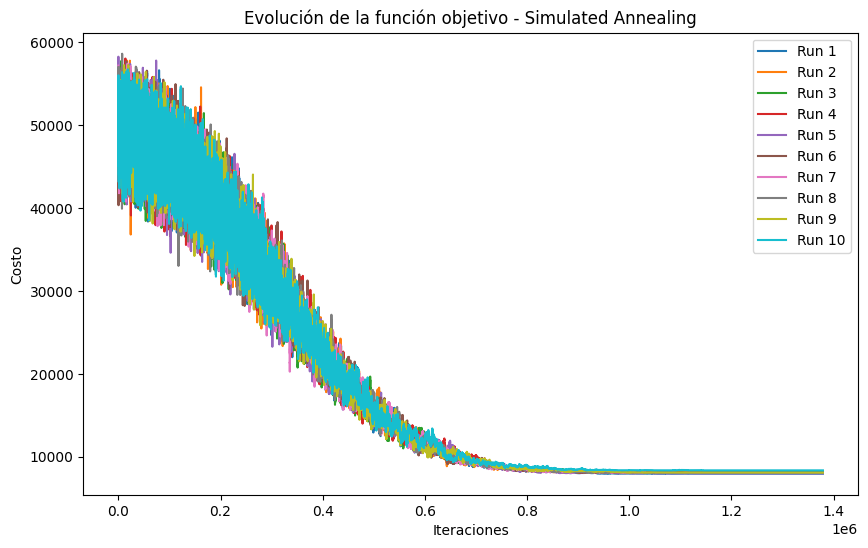

Mejor solución Simulated Annealing: Costo = 7963.505573094438


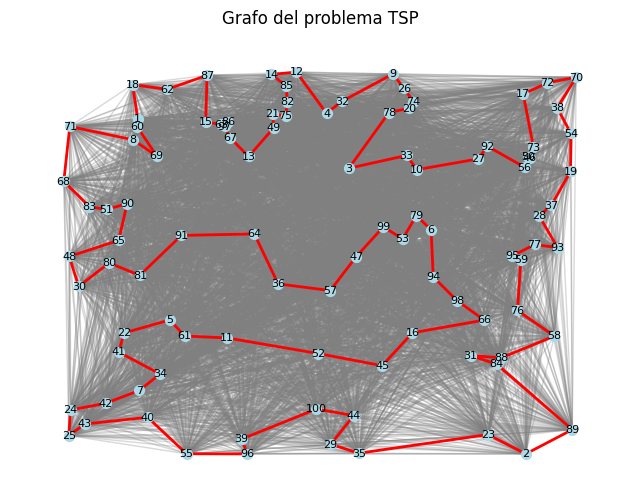

In [31]:
# --- Procesamiento de todos los archivos TSP ---
for nombre_archivo in tspProblem:
    print(f"\nProcesando archivo: {nombre_archivo}")
    grafo, puntos = load_graph(nombre_archivo)

    # ----- Hill Climbing -----
    hc_results = []    # Para almacenar (recorrido, costo, tiempo)
    hc_histories = []  # Para almacenar la evolución de la función objetivo de cada run
    hc_total_time = 0
    print("\nEjecutando Hill Climbing 10 veces...")
    for i in range(10):
        inicio_hc = time.time()
        # Se espera que hill_climbing_tsp retorne: recorrido, costo y history (lista de evolución)
        recorrido_hc, costo_hc, history_hc = hill_climbing_tsp(grafo)
        fin_hc = time.time()
        tiempo_hc = fin_hc - inicio_hc
        hc_total_time += tiempo_hc
        hc_results.append((recorrido_hc, costo_hc, tiempo_hc))
        hc_histories.append(history_hc)
        print(f"Hill Climbing Run {i+1}: Costo = {costo_hc:.2f}, Tiempo = {tiempo_hc:.4f} s")

    print("Hill Climbing - Tiempo Promedio: {:.4f} s".format(hc_total_time/10))

    # Graficar la evolución de la función objetivo para Hill Climbing
    plt.figure(figsize=(10,6))
    for idx, history in enumerate(hc_histories):
        plt.plot(history, label=f'Run {idx+1}')
    plt.title("Evolución de la función objetivo - Hill Climbing")
    plt.xlabel("Iteraciones")
    plt.ylabel("Costo")
    plt.legend()
    plt.show()

    # Seleccionar la mejor solución (la de menor costo) para graficar el recorrido
    mejor_hc = min(hc_results, key=lambda x: x[1])
    print("Mejor solución Hill Climbing: Costo =", mejor_hc[1])
    graficar_grafo(grafo, puntos, mejor_hc[0])

    # ----- Simulated Annealing -----
    sa_results = []    # Para almacenar (recorrido, costo, tiempo)
    sa_histories = []  # Para almacenar la evolución de la función objetivo de cada run
    sa_total_time = 0
    print("\nEjecutando Simulated Annealing 10 veces...")
    for i in range(10):
        inicio_sa = time.time()
        # Se espera que simulated_annealing_tsp retorne: recorrido, costo y history (lista de evolución)
        recorrido_sa, costo_sa, history_sa = simulated_annealing_tsp(grafo)
        fin_sa = time.time()
        tiempo_sa = fin_sa - inicio_sa
        sa_total_time += tiempo_sa
        sa_results.append((recorrido_sa, costo_sa, tiempo_sa))
        sa_histories.append(history_sa)
        print(f"Simulated Annealing Run {i+1}: Costo = {costo_sa:.2f}, Tiempo = {tiempo_sa:.4f} s")

    print("Simulated Annealing - Tiempo Promedio: {:.4f} s".format(sa_total_time/10))

    # Graficar la evolución de la función objetivo para Simulated Annealing
    plt.figure(figsize=(10,6))
    for idx, history in enumerate(sa_histories):
        plt.plot(history, label=f'Run {idx+1}')
    plt.title("Evolución de la función objetivo - Simulated Annealing")
    plt.xlabel("Iteraciones")
    plt.ylabel("Costo")
    plt.legend()
    plt.show()

    # Seleccionar la mejor solución para graficar el recorrido
    mejor_sa = min(sa_results, key=lambda x: x[1])
    print("Mejor solución Simulated Annealing: Costo =", mejor_sa[1])
    graficar_grafo(grafo, puntos, mejor_sa[0])
